# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


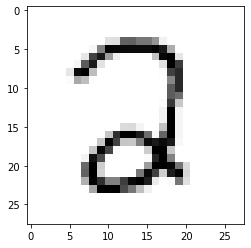

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2483507311433191
train accuracy is: 0.6082457018861626, test accuracy is 0.5942540322580645


Epoch 10 Loss 0.09698938153950096
train accuracy is: 0.9198798197295944, test accuracy is 0.9243951612903226


Epoch 20 Loss 0.0573620230608853
train accuracy is: 0.9414121181772659, test accuracy is 0.9455645161290323


Epoch 30 Loss 0.04446623755830744
train accuracy is: 0.9517609747955266, test accuracy is 0.9571572580645161


Epoch 40 Loss 0.03810336135128959
train accuracy is: 0.957603071273577, test accuracy is 0.9621975806451613


Epoch 50 Loss 0.03416405797754375
train accuracy is: 0.9617759973293273, test accuracy is 0.9637096774193549


Epoch 60 Loss 0.03147692587019327
train accuracy is: 0.9639459188783175, test accuracy is 0.9662298387096774


Epoch 70 Loss 0.02946743187910247
train accuracy is: 0.9661158404273076, test accuracy is 0.9682459677419355


Epoch 80 Loss 0.027909434698415083
train accuracy is: 0.9677015523284928, test accuracy is 0.9682459677419355


Epoch 90 Loss 0.02660947578488862
train accuracy is: 0.9693707227507928, test accuracy is 0.9682459677419355


Epoch 100 Loss 0.025528861998089233
train accuracy is: 0.9705391420464029, test accuracy is 0.967741935483871


Epoch 110 Loss 0.024593829454689575
train accuracy is: 0.971540644299783, test accuracy is 0.9682459677419355


Epoch 120 Loss 0.023767326864344858
train accuracy is: 0.9725421465531631, test accuracy is 0.969758064516129


Epoch 130 Loss 0.023010105692972623
train accuracy is: 0.9737105658487731, test accuracy is 0.9702620967741935


Epoch 140 Loss 0.02233275369581084
train accuracy is: 0.9744616925388082, test accuracy is 0.9707661290322581


Epoch 150 Loss 0.02170514413707437
train accuracy is: 0.9752128192288433, test accuracy is 0.9722782258064516


Epoch 160 Loss 0.021118506220592546
train accuracy is: 0.9758804873977633, test accuracy is 0.9737903225806451


Epoch 170 Loss 0.02056414317206033
train accuracy is: 0.9763812385244534, test accuracy is 0.9737903225806451


Epoch 180 Loss 0.02004658849927251
train accuracy is: 0.9771323652144884, test accuracy is 0.9737903225806451


Epoch 190 Loss 0.019545992401690627
train accuracy is: 0.9783007845100985, test accuracy is 0.9737903225806451


Epoch 200 Loss 0.01908521882818223
train accuracy is: 0.9786346185945585, test accuracy is 0.9737903225806451


Epoch 210 Loss 0.018636889006578266
train accuracy is: 0.9789684526790186, test accuracy is 0.9737903225806451


Epoch 220 Loss 0.018200876562690725
train accuracy is: 0.9793022867634785, test accuracy is 0.9742943548387096


Epoch 230 Loss 0.01779146307061482
train accuracy is: 0.9799699549323986, test accuracy is 0.9747983870967742


Epoch 240 Loss 0.0173931670126187
train accuracy is: 0.9811383742280086, test accuracy is 0.9753024193548387


0.014662854318685352

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23974590420460445
train accuracy is: 0.7191620764480053, test accuracy is 0.7338709677419355


Epoch 10 Loss 0.10092408862352319
train accuracy is: 0.915039225504924, test accuracy is 0.9294354838709677


Epoch 20 Loss 0.07838943913948059
train accuracy is: 0.92847604740444, test accuracy is 0.9420362903225806


Epoch 30 Loss 0.06791901907079756
train accuracy is: 0.9354031046569855, test accuracy is 0.9495967741935484


Epoch 40 Loss 0.061549478949686806
train accuracy is: 0.9403271574027708, test accuracy is 0.9526209677419355


Epoch 50 Loss 0.057161797482335
train accuracy is: 0.943164747120681, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.05391550294151447
train accuracy is: 0.9462527124019362, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.05139203220552451
train accuracy is: 0.9480887998664663, test accuracy is 0.9586693548387096


Epoch 80 Loss 0.049359709073540106
train accuracy is: 0.9500083458521115, test accuracy is 0.9601814516129032


Epoch 90 Loss 0.0476782384093915
train accuracy is: 0.9514271407110666, test accuracy is 0.9621975806451613


Epoch 100 Loss 0.04625778840735118
train accuracy is: 0.9526790185277917, test accuracy is 0.9637096774193549


Epoch 110 Loss 0.045037181025057736
train accuracy is: 0.9537639793022867, test accuracy is 0.9647177419354839


Epoch 120 Loss 0.04397318607650781
train accuracy is: 0.9546820230345519, test accuracy is 0.9647177419354839


Epoch 130 Loss 0.0430362829605449
train accuracy is: 0.9554331497245869, test accuracy is 0.9647177419354839


Epoch 140 Loss 0.042200581927346034
train accuracy is: 0.956518110499082, test accuracy is 0.9662298387096774


Epoch 150 Loss 0.041451097499458266
train accuracy is: 0.956851944583542, test accuracy is 0.9662298387096774


Epoch 160 Loss 0.04077204625692069
train accuracy is: 0.957436154231347, test accuracy is 0.9662298387096774


Epoch 170 Loss 0.04015416664472438
train accuracy is: 0.9581872809213821, test accuracy is 0.9662298387096774


Epoch 180 Loss 0.039588527557565596
train accuracy is: 0.9581872809213821, test accuracy is 0.9662298387096774


Epoch 190 Loss 0.039067197743412545
train accuracy is: 0.9589384076114171, test accuracy is 0.9662298387096774


Epoch 200 Loss 0.038585295311992285
train accuracy is: 0.9590218661325322, test accuracy is 0.9657258064516129


Epoch 210 Loss 0.038138298704417734
train accuracy is: 0.9591887831747622, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.037721276688735816
train accuracy is: 0.9596060757803372, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.037331955452953744
train accuracy is: 0.9598564513436821, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03696686628667463
train accuracy is: 0.9599399098647972, test accuracy is 0.9662298387096774


0.045338095129329785

### Comparing results of NN and LR

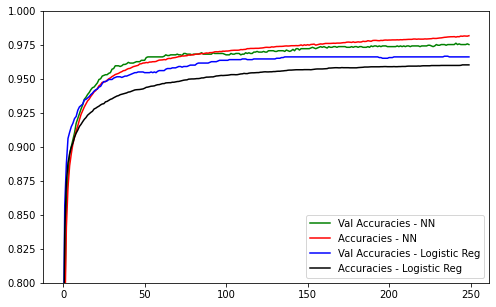

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

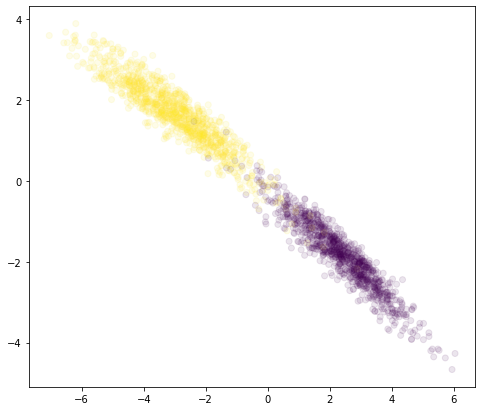

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

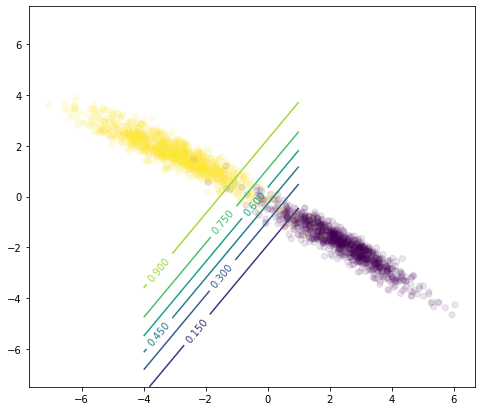

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );